In [28]:
%matplotlib inline
# Import
from pov_transform import fp_transform
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2 as cv
import imutils
import matplotlib.pyplot as plt


Testing image contouring


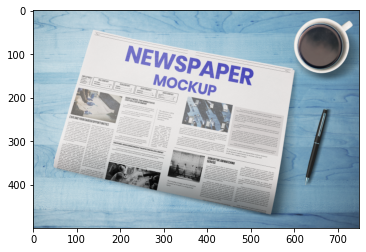

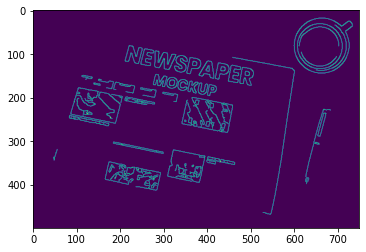


Approx ->  9

Approx ->  9

Approx ->  8

Approx ->  8

Approx ->  9


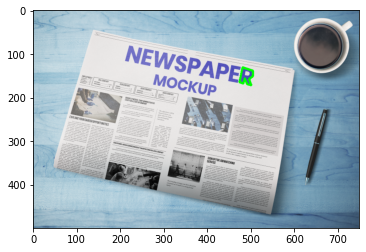

In [62]:


# FOR COMPATABILITY
import os

dir_path = os.getcwd()
im_loc = os.path.join(dir_path, 'testBed/newspaper_medium.jpg')

def process_image(image):
    # Load image, find height and ratio of old vs new height.
    # Clone the image and then resize it into another image
    im = cv.imread(image)
    ratio = im.shape[0] / 500.0
    gt = im.shape[0]
    gtt = im.shape
    orig = im.copy()
    im = imutils.resize(im, height=500)
    
    return im

def detect_edge(image):
    # Filter the image in grayscale and then blur to locate edge
    # 
    gs = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # Blur bg to gray
    gs = cv.GaussianBlur(gs, (5, 5), 0)
    im_edge = cv.Canny(gs, 75, 200)

    return im_edge

def find_doc(edge_image, source_image):
    # Find the contour of GRAYSCALED image
    # Grab the maximum possible contours
    # Sort the contour in Descending order and take most apparent contours
    # Better performance ^^^
    #
    contour = cv.findContours(edge_image.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    contour = imutils.grab_contours(contour)
    contour = sorted(contour, key=cv.contourArea, reverse=True)[:5]

    # Approximate the High vertice curve into simpler curve for performance

    for c in contour:
        perimeter = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.02 * perimeter, True)

        # See the length of the approx is 4 points if so then
        # Save and break loop
        if len(approx) == 4:
            docContour = approx
            break
        else:
            docContour = approx
    
    docContour = cv.drawContours(source_image, [docContour], -1, (0,255,0), 4)

    return docContour


def main():
    print("Testing image contouring")

    image = process_image(im_loc)
    result = detect_edge(image)

    plt.imshow(image)
    plt.show()
    plt.imshow(result)
    plt.show()

    final = find_doc(result, image)
    
    plt.imshow(final)
    plt.show()

    

main()
